In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df=pd.read_csv("D:/GUVI/House Price Prediction/train-chennai-sale.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,P09411,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,...,4.9,4.2,2.5,3.765,760122,304049,21717770,4.067698e+07,1.04,1.872981
1,P05346,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,...,4.7,3.9,3.6,4.010,356321,77042,9630290,1.541840e+07,1.04,1.601032
2,P00219,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,...,4.5,2.6,3.1,3.320,409027,198316,12394750,1.696307e+07,1.04,1.368569
3,P09105,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,...,3.6,2.1,2.5,2.670,263152,33955,8488790,1.528783e+07,1.04,1.800944
4,P09679,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,...,2.4,4.5,2.1,3.260,604809,235204,16800250,3.146655e+07,1.04,1.872981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P05438,T Nagar,1733,24-02-2010,1.0,1.0,4,Ab Normal,Yes,02-03-1985,...,3.4,3.7,2.1,2.890,702058,312026,19501600,3.122269e+07,1.04,1.601032
7105,P05042,Karapakkam,666,11-05-2010,1.0,1.0,2,Adj Land,Yes,20-05-1974,...,3.2,4.4,2.5,3.280,273317,74541,6211750,9.945212e+06,1.04,1.601032
7106,P10000,Velachery,1897,08-04-2004,3.0,2.0,5,Family,Yes,11-04-1995,...,3.6,4.5,3.3,3.920,346191,205551,10818480,2.191626e+07,1.04,2.025817
7107,P06508,Karapakkam,787,03-08-2009,1.0,1.0,2,Partial,Yes,11-08-1977,...,4.6,3.8,4.1,4.160,425350,119098,8507000,1.416478e+07,1.04,1.665074


In [25]:
df.MZZONE.unique()

array(['RH', 'I', 'RL', 'RM', 'A', 'C'], dtype=object)

In [26]:
df.drop(['INF_PRICE','1+0.04','POWER(Z,Y)','PRT_ID'],axis=1,inplace=True)

In [27]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Anna Nagar,1986,19-12-2006,2.0,1.0,5,Ab Normal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
1,Velachery,1855,13-03-2010,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
2,Chrompet,1220,11-09-2014,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSewer,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
3,Chrompet,1167,05-04-2007,1.0,1.0,3,Partial,No,12-04-1979,Others,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
4,Velachery,1847,13-03-2006,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,T Nagar,1733,24-02-2010,1.0,1.0,4,Ab Normal,Yes,02-03-1985,Commercial,NoSewer,No Access,RL,3.4,3.7,2.1,2.890,702058,312026,19501600
7105,Karapakkam,666,11-05-2010,1.0,1.0,2,Adj Land,Yes,20-05-1974,Others,ELO,Gravel,I,3.2,4.4,2.5,3.280,273317,74541,6211750
7106,Velachery,1897,08-04-2004,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSewer,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7107,Karapakkam,787,03-08-2009,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [28]:
df.set_index("DATE_SALE",inplace=True)
df.index=pd.to_datetime(df.index)
df['sale_year']=df.index.year
df['sale_month']=df.index.month
df['sale_day']=df.index.day
df['day_of_week']=df.index.dayofweek


C:\Users\avmoh\AppData\Local\Temp\ipykernel_22576\2867967500.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.index=pd.to_datetime(df.index)


In [29]:
df.reset_index(drop=True,inplace=True)

In [30]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year,sale_month,sale_day,day_of_week
0,Anna Nagar,1986,2.0,1.0,5,Ab Normal,No,22-12-1995,Commercial,AllPub,...,4.2,2.5,3.765,760122,304049,21717770,2006,12,19,1
1,Velachery,1855,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewer,...,3.9,3.6,4.010,356321,77042,9630290,2010,3,13,5
2,Chrompet,1220,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSewer,...,2.6,3.1,3.320,409027,198316,12394750,2014,9,11,3
3,Chrompet,1167,1.0,1.0,3,Partial,No,12-04-1979,Others,AllPub,...,2.1,2.5,2.670,263152,33955,8488790,2007,4,5,3
4,Velachery,1847,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,...,4.5,2.1,3.260,604809,235204,16800250,2006,3,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,T Nagar,1733,1.0,1.0,4,Ab Normal,Yes,02-03-1985,Commercial,NoSewer,...,3.7,2.1,2.890,702058,312026,19501600,2010,2,24,2
7105,Karapakkam,666,1.0,1.0,2,Adj Land,Yes,20-05-1974,Others,ELO,...,4.4,2.5,3.280,273317,74541,6211750,2010,5,11,1
7106,Velachery,1897,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSewer,...,4.5,3.3,3.920,346191,205551,10818480,2004,4,8,3
7107,Karapakkam,787,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,...,3.8,4.1,4.160,425350,119098,8507000,2009,8,3,0


In [31]:
from datetime import datetime
def convert_date(dateformat):
  x=datetime.strptime(dateformat,"%d-%m-%Y")
  return x.toordinal()

In [32]:
df.DATE_BUILD=df.DATE_BUILD.apply(lambda i:convert_date(i))

In [33]:
df.dropna(how="any",subset=['N_BEDROOM','N_BATHROOM'],inplace=True)

In [34]:
df['QS_OVERALL']=df.apply(lambda i:round(i['QS_OVERALL'],2) if not np.isnan(i['QS_OVERALL'])else round(np.mean([i['QS_ROOMS'],i['QS_BATHROOM'],i['QS_BEDROOM']]),2),axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7103 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7103 non-null   object 
 1   INT_SQFT       7103 non-null   int64  
 2   N_BEDROOM      7103 non-null   float64
 3   N_BATHROOM     7103 non-null   float64
 4   N_ROOM         7103 non-null   int64  
 5   SALE_COND      7103 non-null   object 
 6   PARK_FACIL     7103 non-null   object 
 7   DATE_BUILD     7103 non-null   int64  
 8   BUILDTYPE      7103 non-null   object 
 9   UTILITY_AVAIL  7103 non-null   object 
 10  STREET         7103 non-null   object 
 11  MZZONE         7103 non-null   object 
 12  QS_ROOMS       7103 non-null   float64
 13  QS_BATHROOM    7103 non-null   float64
 14  QS_BEDROOM     7103 non-null   float64
 15  QS_OVERALL     7103 non-null   float64
 16  REG_FEE        7103 non-null   int64  
 17  COMMIS         7103 non-null   int64  
 18  SALES_PRICE  

In [36]:
from sklearn.preprocessing import LabelEncoder
encoded=LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i]=encoded.fit_transform(df[i])

In [37]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,sale_year,sale_month,sale_day,day_of_week
0,1,1986,2.0,1.0,5,0,0,728649,0,0,...,4.2,2.5,3.77,760122,304049,21717770,2006,12,19,1
1,6,1855,3.0,2.0,5,2,0,725814,2,2,...,3.9,3.6,4.01,356321,77042,9630290,2010,3,13,5
2,2,1220,2.0,1.0,4,4,0,733662,0,2,...,2.6,3.1,3.32,409027,198316,12394750,2014,9,11,3
3,2,1167,1.0,1.0,3,4,0,722551,2,0,...,2.1,2.5,2.67,263152,33955,8488790,2007,4,5,3
4,6,1847,3.0,2.0,5,2,0,728733,0,0,...,4.5,2.1,3.26,604809,235204,16800250,2006,3,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,5,1733,1.0,1.0,4,0,1,724702,0,2,...,3.7,2.1,2.89,702058,312026,19501600,2010,2,24,2
7105,4,666,1.0,1.0,2,1,1,720763,2,1,...,4.4,2.5,3.28,273317,74541,6211750,2010,5,11,1
7106,6,1897,3.0,2.0,5,2,1,728394,2,2,...,4.5,3.3,3.92,346191,205551,10818480,2004,4,8,3
7107,4,787,1.0,1.0,2,4,1,721942,0,1,...,3.8,4.1,4.16,425350,119098,8507000,2009,8,3,0


In [38]:
x=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss=StandardScaler().fit(x_train)
x_train_ss= ss.transform(x_train)
x_test_ss= ss.transform(x_test)

In [42]:
x_train_ss_df=pd.DataFrame(x_train_ss,columns=x_train.columns)
x_test_ss_df=pd.DataFrame(x_test_ss,columns=x_test.columns)
x_train_ss_df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,sale_year,sale_month,sale_day,day_of_week
0,1.651140,0.532519,0.459976,-0.518726,0.306692,0.698672,0.988963,0.040075,-1.238542,-0.296017,...,-1.698526,0.221431,-1.663407,-1.389024,0.952312,0.649209,-2.615172,-0.142680,1.535192,-0.988493
1,1.105967,1.340589,0.459976,-0.518726,1.291008,1.402473,-1.011161,0.649007,-0.004293,0.883557,...,-1.362810,0.332598,0.138392,-0.455642,0.428506,1.155136,0.095489,-0.991869,-0.057572,-1.489083
2,-0.529550,-0.367777,0.459976,-0.518726,0.306692,-0.005130,-1.011161,1.411307,1.229955,-1.475592,...,0.651487,-1.001402,-0.312058,-0.512788,-0.787656,0.086799,0.999043,1.272634,-0.853954,0.012687
3,-1.074722,1.309848,0.459976,-0.518726,1.291008,-0.005130,0.988963,-0.730879,-0.004293,-0.296017,...,0.763392,-0.112069,-0.086833,0.344399,0.176727,1.009979,0.547266,0.706508,0.738810,0.012687
4,-1.619894,-0.473177,-0.795961,-0.518726,-0.677624,-1.412732,-1.011161,-0.966664,-0.004293,-1.475592,...,0.763392,0.777264,-0.199445,0.477739,-0.422811,-1.400835,-0.808065,0.706508,1.307654,1.013867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,0.015623,2.249669,2.971849,1.927798,2.275323,1.402473,-1.011161,-0.423060,-1.238542,0.883557,...,0.091960,0.110264,1.039291,0.801565,1.200108,3.660300,-0.808065,0.423446,0.056197,1.013867
6033,-0.529550,-1.171455,-0.795961,-0.518726,-0.677624,0.698672,-1.011161,-0.505693,1.229955,0.883557,...,-1.362810,-1.223735,0.588842,-1.236635,-1.304696,-0.721766,0.547266,0.140383,1.648961,1.013867
6034,-0.529550,-1.380060,-0.795961,-0.518726,-1.661940,-0.005130,0.988963,-0.676367,-0.004293,0.883557,...,0.763392,-0.000902,-1.550794,-0.398497,-0.965874,-0.425840,1.450820,-0.425743,1.762729,0.513277
6035,-1.074722,0.967296,0.459976,-0.518726,1.291008,1.402473,0.988963,-0.052942,-0.004293,-0.296017,...,-1.138999,1.666597,-0.199445,-0.112768,0.087997,1.109469,-0.356288,-0.708806,0.966347,0.513277


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout

c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 120)            │         2,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,951 (117.00 KB)

 Trainable params: 29,951 (117.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 132930538045440.0000 - mean_absolute_error: 10867918.0000 - mean_absolute_percentage_error: 99.6941 - mean_squared_error: 132930538045440.0000 - mean_squared_logarithmic_error: 152.5698 - val_loss: 73488970809344.0000 - val_mean_absolute_error: 8092868.0000 - val_mean_absolute_percentage_error: 74.9770 - val_mean_squared_error: 73488970809344.0000 - val_mean_squared_logarithmic_error: 2.2870
Epoch 2/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28761015713792.0000 - mean_absolute_error: 4370075.0000 - mean_absolute_percentage_error: 41.0782 - mean_squared_error: 28761015713792.0000 - mean_squared_logarithmic_error: 0.6451 - val_loss: 4749621985280.0000 - val_mean_absolute_error: 1733176.6250 - val_mean_absolute_percentage_error: 16.6313 - val_mean_squared_error: 4749621985280.0000 - val_mean_squared_logarithmic_error: 0.0504
Epoch 3/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5809422467072.0000 - mean_absolute_er

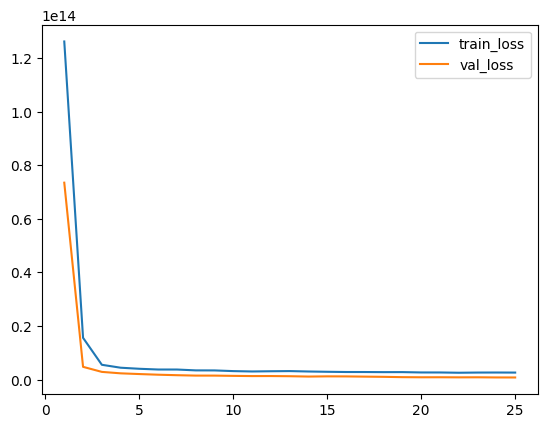

In [49]:
model1=Sequential()
#input dimension is 4-neuron --> Developer scope
model1.add(Dense(120,input_shape=(x_train_ss_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-1
model1.add(Dropout(0.3))
model1.add(Dense(100,input_shape=(x_train_ss_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-2
model1.add(Dropout(0.2))
model1.add(Dense(80,input_shape=(x_train_ss_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-3
model1.add(Dropout(0.25))
model1.add(Dense(60,input_shape=(x_train_ss_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-4
#model1.add(Dropout(0.3))
model1.add(Dense(30,input_shape=(x_train_ss_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-5
#model1.add(Dropout(0.5))
model1.add(Dense(10,input_shape=(x_train_ss_df.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-6
#model1.add(Dropout(0.5))
model1.add(Dense(1)) #output layer



model1.compile(optimizer="adam",loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanSquaredLogarithmicError()])

model1.summary()

result1=model1.fit(x_train_ss_df,y_train,epochs=25,validation_split=0.2,batch_size=32)

result_df1=pd.DataFrame(result1.history)
result_df1


plt.plot(range(1,26),result_df1['loss'],label="train_loss")
plt.plot(range(1,26),result_df1['val_loss'],label="val_loss")
plt.legend()

In [50]:
predicted=model1.evaluate(x_test_ss_df,y_test)
predicted

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 716926484480.0000 - mean_absolute_error: 659730.2500 - mean_absolute_percentage_error: 6.4648 - mean_squared_error: 716926484480.0000 - mean_squared_logarithmic_error: 0.0076


[738423537664.0,
 668194.875,
 6.448082447052002,
 738423537664.0,
 0.007408212870359421]

In [51]:
result_df1.iloc[-1]

loss                                  2.606652e+12
mean_absolute_error                   1.248856e+06
mean_absolute_percentage_error        1.184328e+01
mean_squared_error                    2.606652e+12
mean_squared_logarithmic_error        2.290998e-02
val_loss                              7.779952e+11
val_mean_absolute_error               6.996002e+05
val_mean_absolute_percentage_error    6.770355e+00
val_mean_squared_error                7.779952e+11
val_mean_squared_logarithmic_error    7.978779e-03
Name: 24, dtype: float64